## Chains

### Chains refer to sequences of calls - whether to an LLM, a tool, or a data preprocessing step.

### Chains that are built with LCEL. In this case, LangChain offers a higher-level constructor method. However, all that is being done under the hood is constructing a chain with LCEL.

### [Legacy] Chains constructed by subclassing from a legacy Chain class. These chains do not use LCEL under the hood but are the standalone classes.

### In simple words, a chain is a sequence of calls, whether those calls are to LLMs, external tools, or data preprocessing steps.

### Chains enable you to go beyond simple LLM interactions; they allow you to construct pipelines that combine different models and functionalities (External data, external API calls).
### By chaining components, you create powerful applications that can leverage the strengths of LLMs or integrate external data and services.

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

# api for groq
GROQ_API = os.getenv("GROQ_API")

In [2]:
from langchain_groq import ChatGroq

chat_groq_model = ChatGroq(
    model='llama-3.1-70b-versatile',
    api_key = GROQ_API,
    temperature= 0.7,
    max_retries=3,
)

## Legacy Chain

LLM Chains:

The most basic type of chain simply takes your input, formats it with a prompt template, and sends it to an LLM for processing.


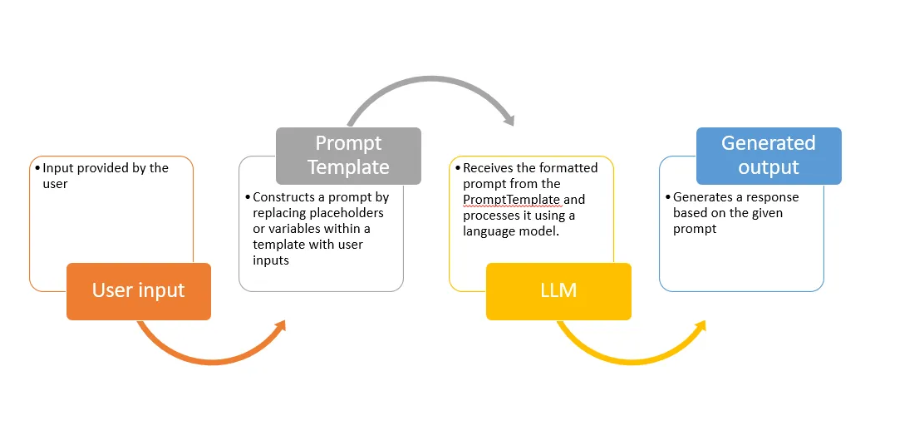

In [3]:
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate

In [7]:
prompt_template = """
  I want to Open a resturant for {cuisine} food. Suggest 
  a fancy name for this
"""

prompt_template = PromptTemplate(
  input_variables=['cuisine'],
  template = prompt_template
)

In [8]:
chain = LLMChain(llm = chat_groq_model, prompt = prompt_template,
                 verbose = True)

C:\Users\rajda\AppData\Local\Temp\ipykernel_5088\978229352.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm = chat_groq_model, prompt = prompt_template,


In [10]:
content = chain.run("Indian")



> Entering new LLMChain chain...
Prompt after formatting:

  I want to Open a resturant for Indian food. Suggest 
  a fancy name for this


> Finished chain.


In [11]:
print(content)

Opening an Indian restaurant sounds like an exciting venture. Here are some fancy name suggestions for your consideration:

1. **Tandoori Nights**: Inspired by the traditional Indian clay oven, this name evokes a sense of warmth and exotic flavors.
2. **Maharaja's Kitchen**: "Maharaja" means "great king" in Hindi, conveying a sense of luxury and grandeur, perfect for a high-end Indian restaurant.
3. **Spice Route**: This name pays homage to the ancient trade routes that connected India to the rest of the world, highlighting the diverse and aromatic spices that are a hallmark of Indian cuisine.
4. **Dhaba Royale**: "Dhaba" is a colloquial term for a roadside eatery in India, while "Royale" adds a touch of sophistication, suggesting a refined and elegant dining experience.
5. **Jaipur Jewel**: Jaipur is a city in India known for its rich cultural heritage and stunning architecture, making it an excellent namesake for a restaurant that serves authentic Indian cuisine.
6. **Bombay Bazaar**

In [12]:
Itfirm_template = """

I want you to act as a consultant for my IT firm.
Return a list of firm names and a locality which is suitable for such a firm in
India. The name should be catchy and the locality should be a tech hub which yeild profit.
what are some good names and respective area for IT firm that does {firm_description} in India?
"""

In [17]:
it_prompt_template = PromptTemplate(
    input_variables=['firm_description'],
    template=Itfirm_template
)

In [14]:
description = "It is software dev firm specifically focusing on Data Science, AI and ML"

In [18]:
it_prompt_template.format(firm_description=description)

'\n\nI want you to act as a consultant for my IT firm.\nReturn a list of firm names and a locality which is suitable for such a firm in\nIndia. The name should be catchy and the locality should be a tech hub which yeild profit.\nwhat are some good names and respective area for IT firm that does It is software dev firm specifically focusing on Data Science, AI and ML in India?\n'

In [19]:
chain = LLMChain(llm = chat_groq_model, prompt = it_prompt_template)

In [20]:
print(chain.run(description))

As a consultant for your IT firm, I'd be happy to provide you with a list of firm names and suitable localities in India that are known for being tech hubs. Here are some suggestions:

**Firm Names:**

1. **DataSphere Technologies**
2. **Aurora Insights**
3. **MindSpark AI**
4. **NexaTech Solutions**
5. **CogniSoft**
6. **Intellecta Analytics**
7. **Pinnacle Data Science**
8. **Axiom AI Labs**
9. **Spectra IT Solutions**
10. **NovaSparks Technologies**

**Localities in India:**

1. **Bengaluru (Karnataka)**: Known as the Silicon Valley of India, Bengaluru is home to many top IT companies and startups. Localities like Electronic City, Whitefield, and Koramangala are popular hubs for tech companies.
2. **Hyderabad (Telangana)**: Hyderabad is a major hub for IT and ITES companies, with areas like Hitech City, Kondapur, and Gachibowli being popular among tech firms.
3. **Pune (Maharashtra)**: Pune is a growing tech hub, with areas like Hinjewadi, Kalyani Nagar, and Baner being popular amon

## LLMMathChain

### Chain that interprets a prompt and executes python code to do math.

### Note: this class is deprecated. and old method.. Langgraph with tool calling is alternative and newer way to do same as shown in below code.

In [22]:
from langchain import LLMMathChain

In [26]:
llm_math = LLMMathChain.from_llm(llm=chat_groq_model,verbose = True)

In [28]:
llm_math.invoke("""what is sin30""")



> Entering new LLMMathChain chain...
what is sin30```text
sin(30 * 3.141592653589793 / 180)
```
...numexpr.evaluate("sin(30 * 3.141592653589793 / 180)")...

Answer: 0.49999999999999994
> Finished chain.


{'question': 'what is sin30', 'answer': 'Answer: 0.49999999999999994'}

## Simple Sequential Chain

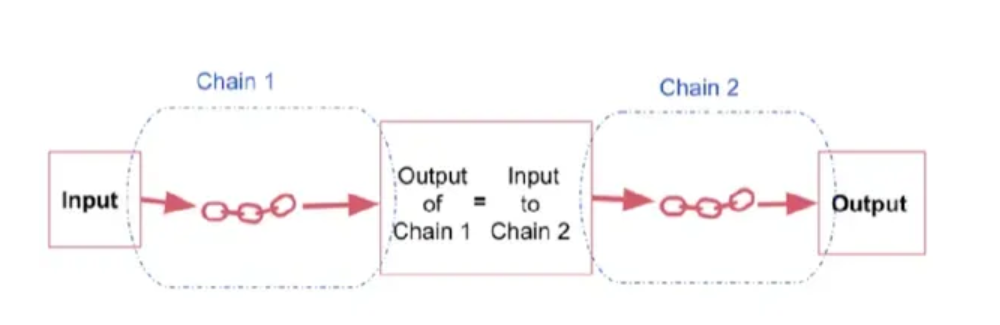

### The simplest form of sequential chains, where each step has a singular input/output, and the output of one step is the input to the next.

### This is useful for: Breaking down complex tasks into smaller, manageable units.Combining the capabilities of multiple LLMs.

In [79]:
name_template = PromptTemplate(
    input_variables=["Cusine"],
    template="I want to open a resturant that serves {Cusine}. can you please suggest me good resturant names ?",
)

name_llm_chain = LLMChain(llm = chat_groq_model, prompt = name_template, verbose = True, output_key = "resturant_name")

In [81]:
food_prompt_template = PromptTemplate(
    input_variables=["resturant_name"],
    template="Suggest some menu items for {resturant_name}?",
)

food_item_llm_chain = LLMChain(llm = chat_groq_model, prompt = food_prompt_template, verbose = True, output_key = "menu_items")

In [35]:
from langchain.chains import SimpleSequentialChain

In [54]:
chain = SimpleSequentialChain(chains = [name_llm_chain,food_item_llm_chain])

In [55]:
response = chain.invoke("Indian")



> Entering new LLMChain chain...
Prompt after formatting:
I want to open a resturant that serves Indian. can you please suggest me good resturant names ?

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Suggest some menu items for What a wonderful venture. Here are some suggestions for Indian restaurant names:

**Traditional and Cultural**

1. Tandoori Nights - inspired by the traditional Indian clay oven
2. Spice Route - a nod to the ancient trade route that connected India to the world
3. Dhaba - a casual, rustic eatery that's popular in India
4. Maharaja's Kitchen - evoking the grandeur of Indian royalty
5. Bollywood Bites - a fun, lively name that captures the spirit of Indian cinema

**Regional Inspirations**

1. Taj Mahal Cafe - named after the iconic Indian monument
2. Kerala Kitchen - showcasing the cuisine of the southern Indian state
3. Punjabi Palace - highlighting the rich flavors of Punjabi cuisine
4. Mumbai Masala - capturing the vibrant en

In [56]:
print(response['output'])

Based on the provided Indian restaurant name suggestions, I will create some menu item ideas for "What a wonderful venture." Since the name of the venture is not specific to any of the provided suggestions, I'll create a general menu that incorporates a variety of Indian dishes. Here are some menu item ideas:

**Appetizers**

1. Spice Route Samosas - crispy samosas filled with spiced potatoes and peas, served with a side of tangy chutney
2. Mumbai Magic - a platter of assorted vegetables and cheese, marinated in a blend of Indian spices and grilled to perfection
3. Dhaba Delight - a flavorful mix of fried cauliflower, carrots, and onions, tossed in a zesty sauce
4. Kerala Krunch - crispy fried plantains served with a side of spicy mango chutney
5. Bollywood Bites - a selection of bite-sized chicken tikka, paneer tikka, and vegetable skewers, served with a dollop of yogurt sauce

**Main Course**

1. Tandoori Nights Chicken - marinated chicken cooked to perfection in a clay oven, served 

# Creating The Rapper And Verifier Chains

### Example to show SimpleSequential Chains


In [101]:
# rapper chain 


rapper_template : str = """
You are an Indian rapper , your job is to come up with
lyrics based on a given topic.

Here is the topic you have been asked to create a lyrics on : {lyrics}
"""

rapper_template : PromptTemplate = PromptTemplate(
    input_variables=['lyrics'],
    template=rapper_template
)

# creating rapper chain

rapper_chain: LLMChain = LLMChain(llm=chat_groq_model, prompt=rapper_template, verbose=True,output_key="lyrics_passed")

In [102]:
# verifier chain which verify lyrics generated by rapper chain 

verifier_template : str = """You are a music producer and you have been given a task to verify the lyrics of a song,
you are tasked to inspect the lyrics and check if it is suitable for the given topic. If they consist of violence and abusive
language, flag that lyrics and reject it. your response should be only one word 'Accept' or 'Reject'

Here is the lyrics you have been asked to verify : {lyrics}
"""
verifier_template : PromptTemplate = PromptTemplate(
    input_variables=['lyrics'],
    template=verifier_template
)

# creating verifier chain

verifier_chain : LLMChain = LLMChain(llm=chat_groq_model, prompt=verifier_template, verbose=True,output_key="response")


In [59]:
# creating simple sequential chain for rapper and verifier chain

ss_chain : SimpleSequentialChain = SimpleSequentialChain(
    chains = [rapper_chain,verifier_chain]
)

# running the chain

review : str = ss_chain.invoke("Love")
print(review)





> Entering new LLMChain chain...
Prompt after formatting:

You are an Indian rapper , your job is to come up with
lyrics based on a given topic.

Here is the topic you have been asked to create a lyrics on : Love


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
You are a music producer and you have been given a task to verify the lyrics of a song,
you are tasked to inspect the lyrics and check if it is suitable for the given topic. If they consist of violence and abusive
language, flag that lyrics and reject it. your response should be only one word 'Accept' or 'Reject'

Here is the lyrics you have been asked to verify : What a beautiful topic, yaar! Here's a brand new track, straight from the heart:

**Verse 1**
Mere dil ki dhadkan, teri yaad mein rehti
Tere bina zikr, mera din raat mein rehti
Pyaar ki nazar, teri aankhon mein dekhi
Mere dil ko chhu liya, teri awaaz mein suni

(My heart beats for you, your memory stays with me
Without you, my days and 

## Sequential Chain

### Chain where the outputs of one chain feed directly into next.

### Multiple Input and Multiple Ouput can be pass to LLM Chain

In [60]:
from langchain.chains import SequentialChain

In [83]:
chain = SequentialChain(chains = [name_llm_chain,food_item_llm_chain],
                        input_variables = ["Cusine"],
                        output_variables = ["resturant_name","menu_items"])

In [85]:
content = chain.invoke("Indian")



> Entering new LLMChain chain...
Prompt after formatting:
I want to open a resturant that serves Indian. can you please suggest me good resturant names ?

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Suggest some menu items for Here are some suggestions for Indian restaurant names:

1. **Tandoori Nights**: Inspired by the traditional Indian tandoor oven, this name evokes a sense of warm and cozy evenings.
2. **Spice Route**: This name references the historical spice trade routes that connected India to the rest of the world, adding a touch of exoticism to your restaurant.
3. **Dhaba**: A "dhaba" is a traditional Indian roadside eatery, and using this name can add a casual, rustic touch to your restaurant.
4. **Mumbai Masala**: This name combines the vibrant city of Mumbai with the idea of spicy, aromatic masalas, which are a hallmark of Indian cuisine.
5. **Taste of India**: Simple and straightforward, this name promises customers a authentic Indian d

In [89]:
print(content['resturant_name'])

Here are some suggestions for Indian restaurant names:

1. **Tandoori Nights**: Inspired by the traditional Indian tandoor oven, this name evokes a sense of warm and cozy evenings.
2. **Spice Route**: This name references the historical spice trade routes that connected India to the rest of the world, adding a touch of exoticism to your restaurant.
3. **Dhaba**: A "dhaba" is a traditional Indian roadside eatery, and using this name can add a casual, rustic touch to your restaurant.
4. **Mumbai Masala**: This name combines the vibrant city of Mumbai with the idea of spicy, aromatic masalas, which are a hallmark of Indian cuisine.
5. **Taste of India**: Simple and straightforward, this name promises customers a authentic Indian dining experience.
6. **Bollywood Bites**: This name combines the glamour of Indian cinema with the idea of delicious, bite-sized food, making it perfect for a casual, fun restaurant.
7. **Garam Masala**: This name references the popular Indian spice blend, and co

In [90]:
print(content['menu_items'])

Here are some menu item suggestions for each of the Indian restaurant names:

**1. Tandoori Nights**
* Tandoori Chicken: marinated chicken cooked in a tandoor oven
* Naan Bread: leavened, buttered flatbread cooked in a tandoor
* Palak Paneer: creamy spinach curry with Indian cheese
* Tandoori Vegetable Skewers: marinated vegetables cooked in a tandoor oven

**2. Spice Route**
* Spice Route Chicken Tikka: marinated chicken cooked in a blend of spices
* Saffron Rice: aromatic rice dish flavored with saffron and cardamom
* Vegetable Korma: mild and creamy curry with a blend of spices
* Lamb Vindaloo: spicy curry with marinated lamb and a blend of spices

**3. Dhaba**
* Dhaba-Style Chicken Curry: spicy and flavorful curry with marinated chicken
* Sarson Ka Saag: spicy mustard green curry with corn bread
* Makki Di Roti: corn bread with butter and spices
* Rajma Masala: kidney bean curry with a blend of spices

**4. Mumbai Masala**
* Mumbai-Style Vada Pav: fried doughnut sandwich with spicy

In [103]:
# Second Example


rapper_gen_chain = SequentialChain(chains = [rapper_chain,verifier_chain],
                                   input_variables = ["lyrics"],
                                   output_variables = ["lyrics_passed","response"])

In [105]:
lyrics_response = rapper_gen_chain.invoke("Love")



> Entering new LLMChain chain...
Prompt after formatting:

You are an Indian rapper , your job is to come up with
lyrics based on a given topic.

Here is the topic you have been asked to create a lyrics on : Love


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
You are a music producer and you have been given a task to verify the lyrics of a song,
you are tasked to inspect the lyrics and check if it is suitable for the given topic. If they consist of violence and abusive
language, flag that lyrics and reject it. your response should be only one word 'Accept' or 'Reject'

Here is the lyrics you have been asked to verify : Love


> Finished chain.


In [107]:
print(lyrics_response['lyrics_passed'])

What a beautiful topic, yaar! Here's a rap song I came up with, straight from the heart:

**Title:** "Dil Ki Dhadkan" (The Beat of My Heart)

**Verse 1:**
Mere dil ki dhadkan, suno toh samjho
Love ki kahani, yeh sirf tumse hai jo
Tumhari aankhon mein, main khud ko dekhta hoon
Ek pal mein, sab kuch bhool jaata hoon
(My heart beats for you, listen and understand
This love story is only with you
In your eyes, I see myself
In one moment, I forget everything)

**Chorus:**
Love, love, yeh hai meri zindagi
Tumse milke, main jaanta hoon
Yeh pyaar ki dastaan, main sunaata hoon
Tumhari mohabbat, meri jaan hai
(Love, love, this is my life
I know myself when I'm with you
This love story, I narrate
Your love is my life)

**Verse 2:**
Tumhari muskaan, mere din banati hai
Tumhari baatein, mere raat ko jagati hai
Main tumse door, ek pal nahin reh sakta
Tumhari yaadon mein, main khud ko beh sakta
(Your smile makes my day
Your talks keep me awake at night
I can't stay away from you for a moment
In your 

In [108]:
print(lyrics_response['response'])

Accept


## Langchain Expression Language (LCEL)

### LangChain Expression Language is a way to create arbitrary custom chains. It is built on the Runnable protocol.

### LangChain Expression Language, or LCEL, is a declarative way to easily compose chains together. LCEL was designed to support putting prototypes in production, with no code changes, from the simplest “prompt + LLM” chain to the most complex chains


In [110]:
from langchain.prompts import PromptTemplate
from langchain.schema import StrOutputParser

In [111]:
prompt_template = """Translate the following English text to French : {text}"""

In [112]:
prompt = PromptTemplate.from_template(template=prompt_template)

In [113]:
chain = prompt | chat_groq_model | StrOutputParser()

In [115]:
response = chain.invoke("Hello world!")

In [116]:
print(response)

The translation of "Hello world!" in French is :

Bonjour le monde !
